In [1]:
#This is a regression analysis using my own custom data the question that i have in mind is to try to 
#come up with a model that can predict the price of a material.

In [2]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [8]:
data=pd.read_excel('RegressionExample.xlsx')

In [9]:
data.head()

,Age of material,Length of material in mm,Price of material
0,2,609,2241
1,3,629,2222
2,1,620,2233
3,2,564,2207
4,1,645,2247


Simple linear regression on length of the material and price

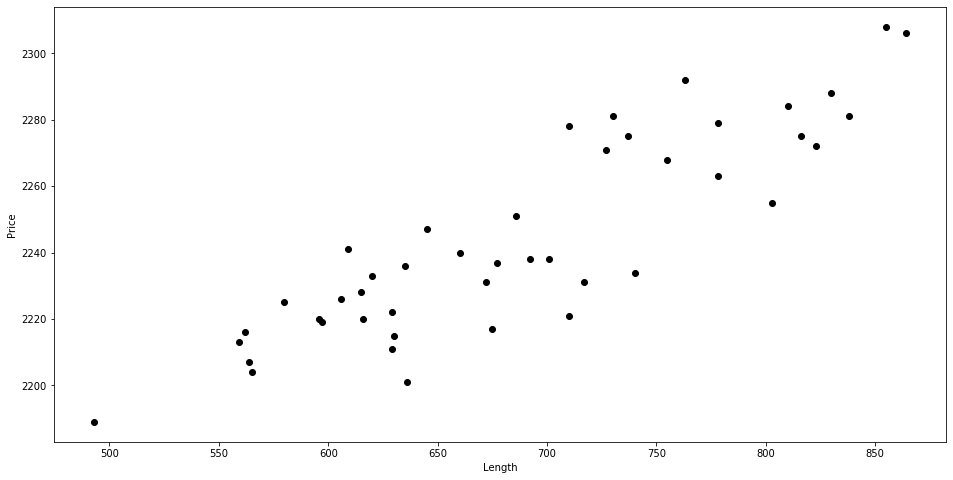

In [20]:
plt.figure(figsize=(16,8))
plt.scatter(data['Length of material in mm'],data['Price of material'],c='black')
plt.xlabel('Length')
plt.ylabel('Price')
plt.show()

In [47]:
#Specify data as required by the sklearn library
x=data['Length of material in mm'].values.reshape(-1,1)
y=data['Price of material'].values.reshape(-1,1)

In [49]:
#Call and fit the simple linear regression model
lm=LinearRegression()
lm.fit(x, y)
print(f"The simple linear model is : Y={lm.intercept_} + {lm.coef_[0][0]}*Length of material")

The simple linear model is : Y=[2046.45081363] + 0.2876123682414822*Length of material
[[0.28761237]]


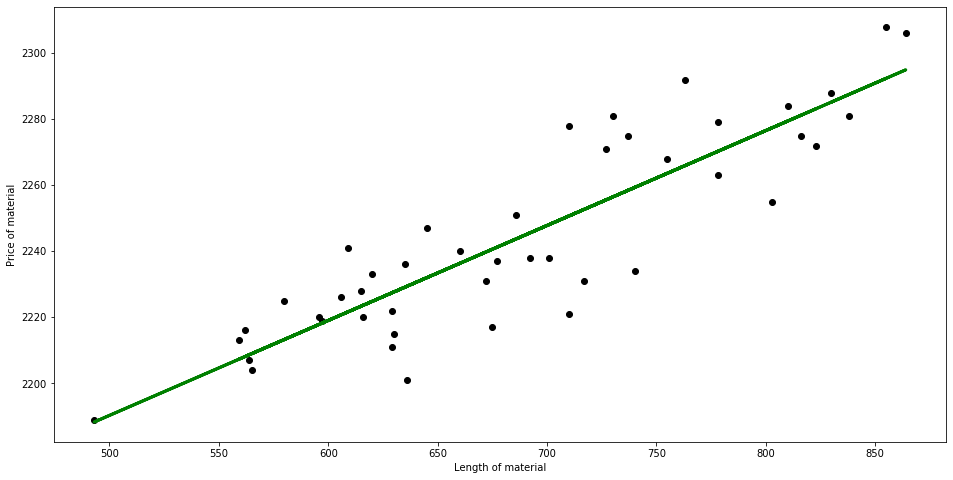

In [38]:
y_pred=lm.predict(x)

#plotting the predictions
plt.figure(figsize=(16,8))
plt.scatter(x,y,c='black')
plt.plot(x,y_pred,c='green',linewidth=3)
plt.xlabel("Length of material")
plt.ylabel("Price of material")
plt.show()

In [39]:
#Now we can make another model using the statsmodel library
x=data['Length of material in mm']
y=data['Price of material']

exog=sm.add_constant(x)
est=sm.OLS(y,exog).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:      Price of material   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     149.7
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           1.34e-15
Time:                        17:04:14   Log-Likelihood:                -182.98
No. Observations:                  45   AIC:                             370.0
Df Residuals:                      43   BIC:                             373.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Multiple linear Regression

In [58]:
#drop the target variable that is the price variable to get the independent variables.
xs=data.drop(['Price of material'],axis=1)
y=data['Price of material'].values.reshape(-1,1)
multiple_lm=LinearRegression()
multiple_lm.fit(xs,y)
print(f"The multiple linear model is : \n Y={multiple_lm.intercept_[0]} + {multiple_lm.coef_[0][0]}*Age of material + {multiple_lm.coef_[0][1]}*Length of material")

The multiple linear model is : 
 Y=2052.0420511028733 + -2.0289797776167977*Age of material + 0.2920066866419524*Length of material


Below i Used the statsmodel to do multiple linear regression

In [65]:
x=np.column_stack((data['Age of material'],data['Length of material in mm']))
y=data['Price of material'].values.reshape(-1,1)
exog=sm.add_constant(x)
est=sm.OLS(y,exog).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     86.36
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           1.32e-15
Time:                        17:45:18   Log-Likelihood:                -180.02
No. Observations:                  45   AIC:                             366.0
Df Residuals:                      42   BIC:                             371.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2052.0421     15.613    131.430      0.0

In [ ]:
'''From the multiple linear regression seems to have a higher R squared value compared to the simple linear regression model.
Although the addition of the age of the material variable seems to have reduced the F-statistics in the multiple regression model,
The overall model seems to have improve din the prediction.''' 